In [32]:
#some imports to use it in program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### read dataset by using pandas 

In [33]:
file = pd.read_csv("dataset.csv")
file

,customer_number,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [34]:
pd.DataFrame(file) #show dataset

,customer_number,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


#### Draw the Scatter plot 

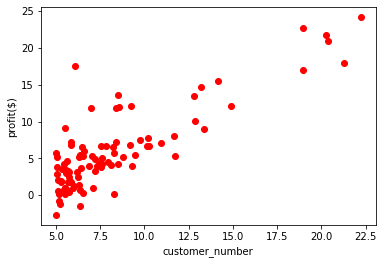

In [35]:
plt.xlabel('customer_number')
plt.ylabel('profit($)')
plt.scatter(file.iloc[:,0],file.iloc[:,-1],color='red')

#### adding a new column called ones to help us in matrices
#### Show new data after adding a column 

In [36]:
file.insert(1,'Ones',1)               
print('new data =\n',file.head(10))  

new data =
    customer_number  Ones   profit
0           6.1101     1  17.5920
1           5.5277     1   9.1302
2           8.5186     1  13.6620
3           7.0032     1  11.8540
4           5.8598     1   6.8233
5           8.3829     1  11.8860
6           7.4764     1   4.3483
7           8.5781     1  12.0000
8           6.4862     1   6.5987
9           5.0546     1   3.8166


In [37]:
x=file.iloc[:,[0,1]]   #separete x (training data) from y by using iloc and show data
y=file.iloc[:,-1]
print(x.head(5))
print(y.head(5))

   customer_number  Ones
0           6.1101     1
1           5.5277     1
2           8.5186     1
3           7.0032     1
4           5.8598     1
0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64


In [38]:
#m is number of rows
#Convert data to numpy matrices

m=len(file.customer_number)
iterations=1500
alpha=0.01
x=np.array(x)
y=np.array(y)
theta=np.array([0,0])

#### Draw the Scatter plot with initial line

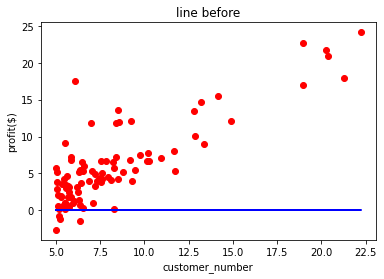

In [39]:
plt.xlabel('customer_number')
plt.ylabel('profit($)')
plt.scatter(file.iloc[:,0],file.iloc[:,-1],color='red')

X=file.iloc[:,0]
Y=theta[0]*X+theta[1]
plt.plot(X,Y,color='blue') 
plt.title("line before")
plt.show()

In [40]:
#Show some data

print('x=\n',x)
print('x.shape=',x.shape)
print('Theta=\n',theta)
print('Theta.shape=',theta.shape)
print('y=\n',y)
print('y.shape=',y.shape)

x=
 [[ 6.1101  1.    ]
 [ 5.5277  1.    ]
 [ 8.5186  1.    ]
 [ 7.0032  1.    ]
 [ 5.8598  1.    ]
 [ 8.3829  1.    ]
 [ 7.4764  1.    ]
 [ 8.5781  1.    ]
 [ 6.4862  1.    ]
 [ 5.0546  1.    ]
 [ 5.7107  1.    ]
 [14.164   1.    ]
 [ 5.734   1.    ]
 [ 8.4084  1.    ]
 [ 5.6407  1.    ]
 [ 5.3794  1.    ]
 [ 6.3654  1.    ]
 [ 5.1301  1.    ]
 [ 6.4296  1.    ]
 [ 7.0708  1.    ]
 [ 6.1891  1.    ]
 [20.27    1.    ]
 [ 5.4901  1.    ]
 [ 6.3261  1.    ]
 [ 5.5649  1.    ]
 [18.945   1.    ]
 [12.828   1.    ]
 [10.957   1.    ]
 [13.176   1.    ]
 [22.203   1.    ]
 [ 5.2524  1.    ]
 [ 6.5894  1.    ]
 [ 9.2482  1.    ]
 [ 5.8918  1.    ]
 [ 8.2111  1.    ]
 [ 7.9334  1.    ]
 [ 8.0959  1.    ]
 [ 5.6063  1.    ]
 [12.836   1.    ]
 [ 6.3534  1.    ]
 [ 5.4069  1.    ]
 [ 6.8825  1.    ]
 [11.708   1.    ]
 [ 5.7737  1.    ]
 [ 7.8247  1.    ]
 [ 7.0931  1.    ]
 [ 5.0702  1.    ]
 [ 5.8014  1.    ]
 [11.7     1.    ]
 [ 5.5416  1.    ]
 [ 7.5402  1.    ]
 [ 5.3077  1.    ]
 [ 7.423

In [41]:
#Cost function 
def cost_function(x,y,theta):
    j=np.sum((x.dot(theta)-y)**2)/2/m
    return j

#### initial cost with theta values 0,0

In [42]:
cost_function(x,y,theta) 

32.072733877455676

In [43]:
# gradient descent function
def gradient_descent(x,y,theta,alpha,iterations):
    cost_history=[0]*iterations
    
    for iteration in range(iterations):
        hypothesis=x.dot(theta)
        loss=hypothesis-y
        gradient=x.T.dot(loss)/m
        theta=theta-(alpha*gradient)
        cost=cost_function(x,y,theta)
        cost_history[iteration]=cost
        
    return theta,cost_history

In [44]:
# call the gradient_descent function 
#theta 0,0
#alpha 0.01
#iterations 1500

(t,c)=gradient_descent(x,y,theta,alpha,iterations)
theta0=t[0]
theta1=t[1]

#### plotting cost history with number of iterations

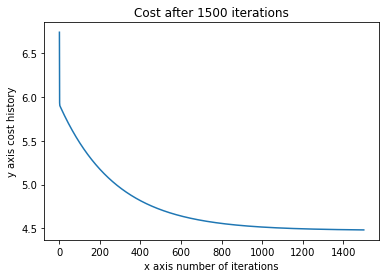

In [45]:
x=np.arange(1,1501,1)
y=c
plt.plot(x,y) 
plt.ylabel("y axis cost history")
plt.xlabel("x axis number of iterations")
plt.title("Cost after 1500 iterations")
plt.show()

#### Plotting the scatter plot of data with the best line after 1500 iteration 

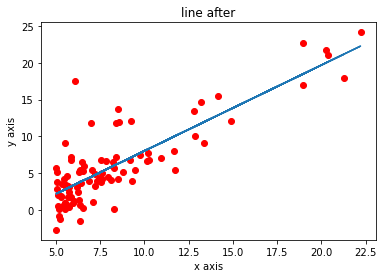

In [46]:
plt.xlabel('customer_number')
plt.ylabel('profit($)')
plt.scatter(file.iloc[:,0],file.iloc[:,-1],color='red')

x=file.iloc[:,0]
y=theta0*x+theta1
plt.plot(x,y) 
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("line after")
plt.show()

In [47]:
# predict function
def predict(x):
    y=theta0*x+theta1
    return y

#### Predict the profit if the number of customers is 35000 and 70000

In [48]:
print(predict(35000))
predict(70000)

40819.05197030596


81641.73423205133

#### read dataset2 by using pandas and show data

In [49]:
file2=pd.read_excel("dataset2.xlsx")
print(file2.to_string)

<bound method DataFrame.to_string of     house_size  room_number   price
0         2104            3  399900
1         1600            3  329900
2         2400            3  369000
3         1416            2  232000
4         3000            4  539900
5         1985            4  299900
6         1534            3  314900
7         1427            3  198999
8         1380            3  212000
9         1494            3  242500
10        1940            4  239999
11        2000            3  347000
12        1890            3  329999
13        4478            5  699900
14        1268            3  259900
15        2300            4  449900
16        1320            2  299900
17        1236            3  199900
18        2609            4  499998
19        3031            4  599000
20        1767            3  252900
21        1888            2  255000
22        1604            3  242900
23        1962            4  259900
24        3890            3  573900
25        1100            3

In [50]:
pd.DataFrame(file2) 

,house_size,room_number,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


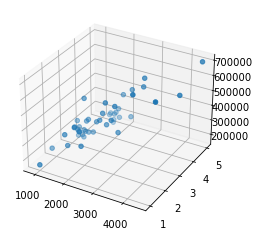

In [51]:
#Draw the Scatter plot
ax=plt.axes(projection="3d")
ax.scatter(file2.iloc[:,0],file2.iloc[:,1],file2.iloc[:,-1])

#### adding a new column called ones to help us in matrices
#### Show new data after adding a column

In [52]:
 file2.insert(2,'ones',1)
print('new data =\n',file2.head(10))

new data =
    house_size  room_number  ones   price
0        2104            3     1  399900
1        1600            3     1  329900
2        2400            3     1  369000
3        1416            2     1  232000
4        3000            4     1  539900
5        1985            4     1  299900
6        1534            3     1  314900
7        1427            3     1  198999
8        1380            3     1  212000
9        1494            3     1  242500


In [53]:
x=file2.iloc[:,[0,1,2]]   #separete x (training data) from y by using iloc and show data
y=file2.iloc[:,-1]
print(x.head(5))
print(y.head(5))

   house_size  room_number  ones
0        2104            3     1
1        1600            3     1
2        2400            3     1
3        1416            2     1
4        3000            4     1
0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64


In [54]:
#m is number of rows
#Convert data to numpy matrices

m=len(file_bonus.house_size  )
iterations=50000
alpha=0.0000001
x=np.array(x)
y=np.array(y)
theta=np.array([0,0,0])

In [55]:
#Show some data
print('x=\n',x)
print('x.shape=',x.shape)
print('Theta=\n',theta)
print('Theta.shape=',theta.shape)
print('y=\n',y)
print('y.shape=',y.shape)

x=
 [[2104    3    1]
 [1600    3    1]
 [2400    3    1]
 [1416    2    1]
 [3000    4    1]
 [1985    4    1]
 [1534    3    1]
 [1427    3    1]
 [1380    3    1]
 [1494    3    1]
 [1940    4    1]
 [2000    3    1]
 [1890    3    1]
 [4478    5    1]
 [1268    3    1]
 [2300    4    1]
 [1320    2    1]
 [1236    3    1]
 [2609    4    1]
 [3031    4    1]
 [1767    3    1]
 [1888    2    1]
 [1604    3    1]
 [1962    4    1]
 [3890    3    1]
 [1100    3    1]
 [1458    3    1]
 [2526    3    1]
 [2200    3    1]
 [2637    3    1]
 [1839    2    1]
 [1000    1    1]
 [2040    4    1]
 [3137    3    1]
 [1811    4    1]
 [1437    3    1]
 [1239    3    1]
 [2132    4    1]
 [4215    4    1]
 [2162    4    1]
 [1664    2    1]
 [2238    3    1]
 [2567    4    1]
 [1200    3    1]
 [ 852    2    1]
 [1852    4    1]
 [1203    3    1]]
x.shape= (47, 3)
Theta=
 [0 0 0]
Theta.shape= (3,)
y=
 [399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 6

In [56]:
def cost_function2(x,y,theta):
    j=np.sum((x.dot(theta)-y)**2)/2/m
    return j

#### initial cost with theta values 0,0,0

In [57]:
cost_function2(x,y,theta) 

65591548106.45744

In [58]:
def gradient_descent2(x,y,theta,alpha,iterations):
    cost_history=[0]*iterations
    
    for iteration in range(iterations):
        hypothesis=x.dot(theta)
        loss=hypothesis-y
        gradient=x.T.dot(loss)/m
        theta=theta-(alpha*gradient)
        cost=cost_function2(x,y,theta)
        cost_history[iteration]=cost
        
    return theta,cost_history

In [59]:
(t,c)=gradient_descent2(x,y,theta,alpha,iterations)
theta0=t[0]
theta1=t[1]
theta2=t[2]

In [60]:
def predict2(x1,x2):
    y=theta0*x1+theta1*x2+theta2
    return y

#### Predict the price if the  house size is 2104 and room number is 3

In [61]:
print(predict2(2104,3))

347967.3210964971


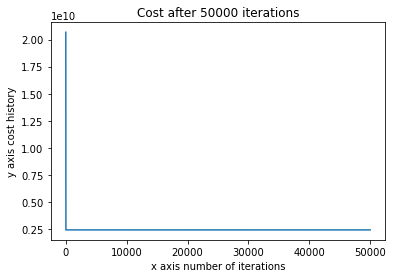

In [62]:
x=c
y=np.arange(1,50001,1)
plt.plot(y,x) 
plt.ylabel("y axis cost history")
plt.xlabel("x axis number of iterations")
plt.title("Cost after 50000 iterations")
plt.show()